In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


#### Analysis on Data

##### Data is on America Heath Care bill to *Either Oppose or in Favor* of Abolishing the ObamaCare

The data has columns*(features)* :
1. Start - The begining of the polls
2. End - The ending of the polls
3. Favor - The number of people in favour of the bill
4. Oppose - The number of people who oppose the  bill


##### My thoughts on the data

The  data may be a time series problem as it were much of the interpretion of the data is not clear.





*N.B*: 

In [2]:
data = pd.read_csv('../data/ahca-polls/ahca_polls.csv',parse_dates=['Start','End'])


In [3]:
data

,Start,End,Pollster,Favor,Oppose,Url,Text
0,2017-06-09,2017-06-11,Public Policy Polling,24,55,http://www.publicpolicypolling.com/pdf/2017/PP...,Do you support or oppose the health care bill ...
1,2017-06-04,2017-06-06,YouGov,33,45,https://d25d2506sfb94s.cloudfront.net/cumulus_...,Do you approve or disapprove of the American H...
2,2017-05-31,2017-06-06,Qunnipiac,17,62,https://poll.qu.edu/national/release-detail?Re...,There is a revised Republican health care plan...
3,2017-05-26,2017-05-30,IPSOS,30,46,https://www.realclearpolitics.com/docs/Core_Po...,Based on everything you know about the new Ame...
4,2017-05-25,2017-05-30,Morning Consult,38,47,https://morningconsult.com/wp-content/uploads/...,"As you may know, the House of Representatives ..."
5,2017-05-17,2017-05-23,Quinnipiac,20,57,https://poll.qu.edu/national/release-detail?Re...,There is a revised Republican health care plan...
6,2017-05-16,2017-05-22,Kaiser Family Foundation,31,55,http://files.kff.org/attachment/Topline-Kaiser...,"As you may know, Congress is currently discuss..."
7,2017-05-13,2017-05-20,Monmouth,32,55,https://www.monmouth.edu/polling-institute/rep...,"Earlier this month, the House of Representativ..."
8,2017-05-13,2017-05-16,YouGov,31,47,https://d25d2506sfb94s.cloudfront.net/cumulus_...,"Overall, given what you know about them, do yo..."
9,2017-05-12,2017-05-16,Public Policy Polling,25,52,http://www.publicpolicypolling.com/pdf/2017/PP...,Do you support or oppose the health care bill ...


In [4]:
data_droped = data.drop(['Url','Pollster'],axis=1)

In [5]:
data_droped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Start   15 non-null     datetime64[ns]
 1   End     15 non-null     datetime64[ns]
 2   Favor   15 non-null     int64         
 3   Oppose  15 non-null     int64         
 4   Text    15 non-null     object        
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 728.0+ bytes


In [58]:
data_droped

,Start,End,Favor,Oppose,Text,Days
0,2017-06-09,2017-06-11,24,55,Do you support or oppose the health care bill ...,2 days
1,2017-06-04,2017-06-06,33,45,Do you approve or disapprove of the American H...,2 days
2,2017-05-31,2017-06-06,17,62,There is a revised Republican health care plan...,6 days
3,2017-05-26,2017-05-30,30,46,Based on everything you know about the new Ame...,4 days
4,2017-05-25,2017-05-30,38,47,"As you may know, the House of Representatives ...",5 days
5,2017-05-17,2017-05-23,20,57,There is a revised Republican health care plan...,6 days
6,2017-05-16,2017-05-22,31,55,"As you may know, Congress is currently discuss...",6 days
7,2017-05-13,2017-05-20,32,55,"Earlier this month, the House of Representativ...",7 days
8,2017-05-13,2017-05-16,31,47,"Overall, given what you know about them, do yo...",3 days
9,2017-05-12,2017-05-16,25,52,Do you support or oppose the health care bill ...,4 days


In [59]:
data_droped['Days']= data_droped['End'] - data_droped['Start']

In [60]:
data_droped

,Start,End,Favor,Oppose,Text,Days
0,2017-06-09,2017-06-11,24,55,Do you support or oppose the health care bill ...,2 days
1,2017-06-04,2017-06-06,33,45,Do you approve or disapprove of the American H...,2 days
2,2017-05-31,2017-06-06,17,62,There is a revised Republican health care plan...,6 days
3,2017-05-26,2017-05-30,30,46,Based on everything you know about the new Ame...,4 days
4,2017-05-25,2017-05-30,38,47,"As you may know, the House of Representatives ...",5 days
5,2017-05-17,2017-05-23,20,57,There is a revised Republican health care plan...,6 days
6,2017-05-16,2017-05-22,31,55,"As you may know, Congress is currently discuss...",6 days
7,2017-05-13,2017-05-20,32,55,"Earlier this month, the House of Representativ...",7 days
8,2017-05-13,2017-05-16,31,47,"Overall, given what you know about them, do yo...",3 days
9,2017-05-12,2017-05-16,25,52,Do you support or oppose the health care bill ...,4 days


In [10]:

data_droped.describe()

,Favor,Oppose,Days
count,15.000000,15.000000,15
mean,28.333333,50.666667,4 days 11:12:00
std,6.343350,5.639993,2 days 00:44:13.906034767
min,17.000000,44.000000,0 days 00:00:00
25%,23.500000,46.500000,3 days 12:00:00
50%,31.000000,48.000000,5 days 00:00:00
75%,31.500000,55.000000,6 days 00:00:00
max,38.000000,62.000000,7 days 00:00:00


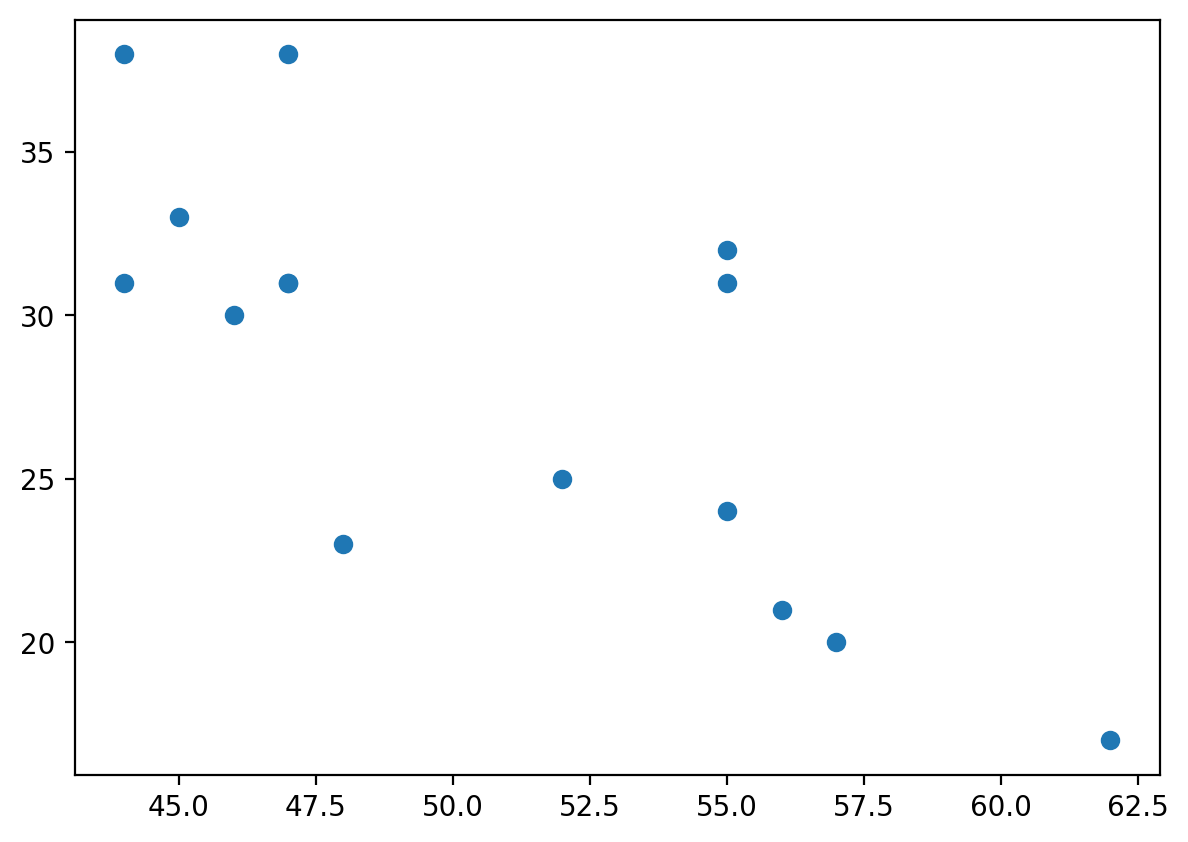

In [61]:
plt.figure(figsize=(7,5),dpi=200)
plt.scatter(data=data_droped,y='Favor',x='Oppose')

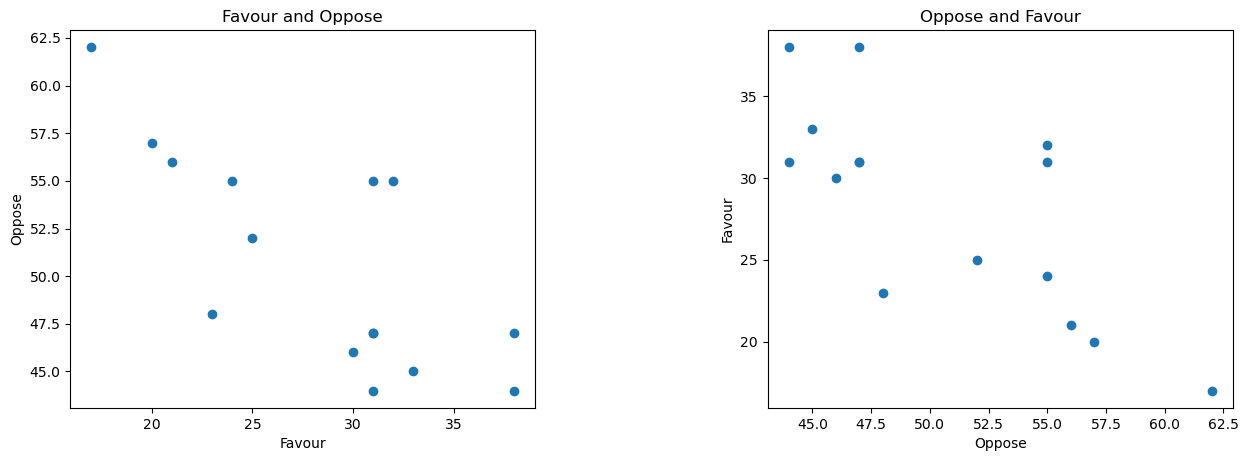

In [62]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5),dpi=100);
fig.subplots_adjust(wspace=0.5,hspace=0.5)

axes[0].scatter(data=data_droped,x='Favor',y='Oppose')
axes[0].set_xlabel('Favour')
axes[0].set_ylabel('Oppose')
axes[0].set_title('Favour and Oppose')

axes[1].scatter(data=data_droped,y='Favor',x='Oppose')
axes[1].set_xlabel('Oppose')
axes[1].set_ylabel('Favour')
axes[1].set_title('Oppose and Favour')





plt.show();

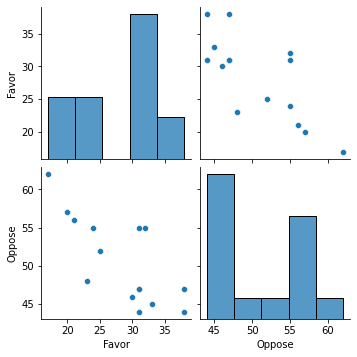

In [76]:

sns.pairplot(data_droped,)

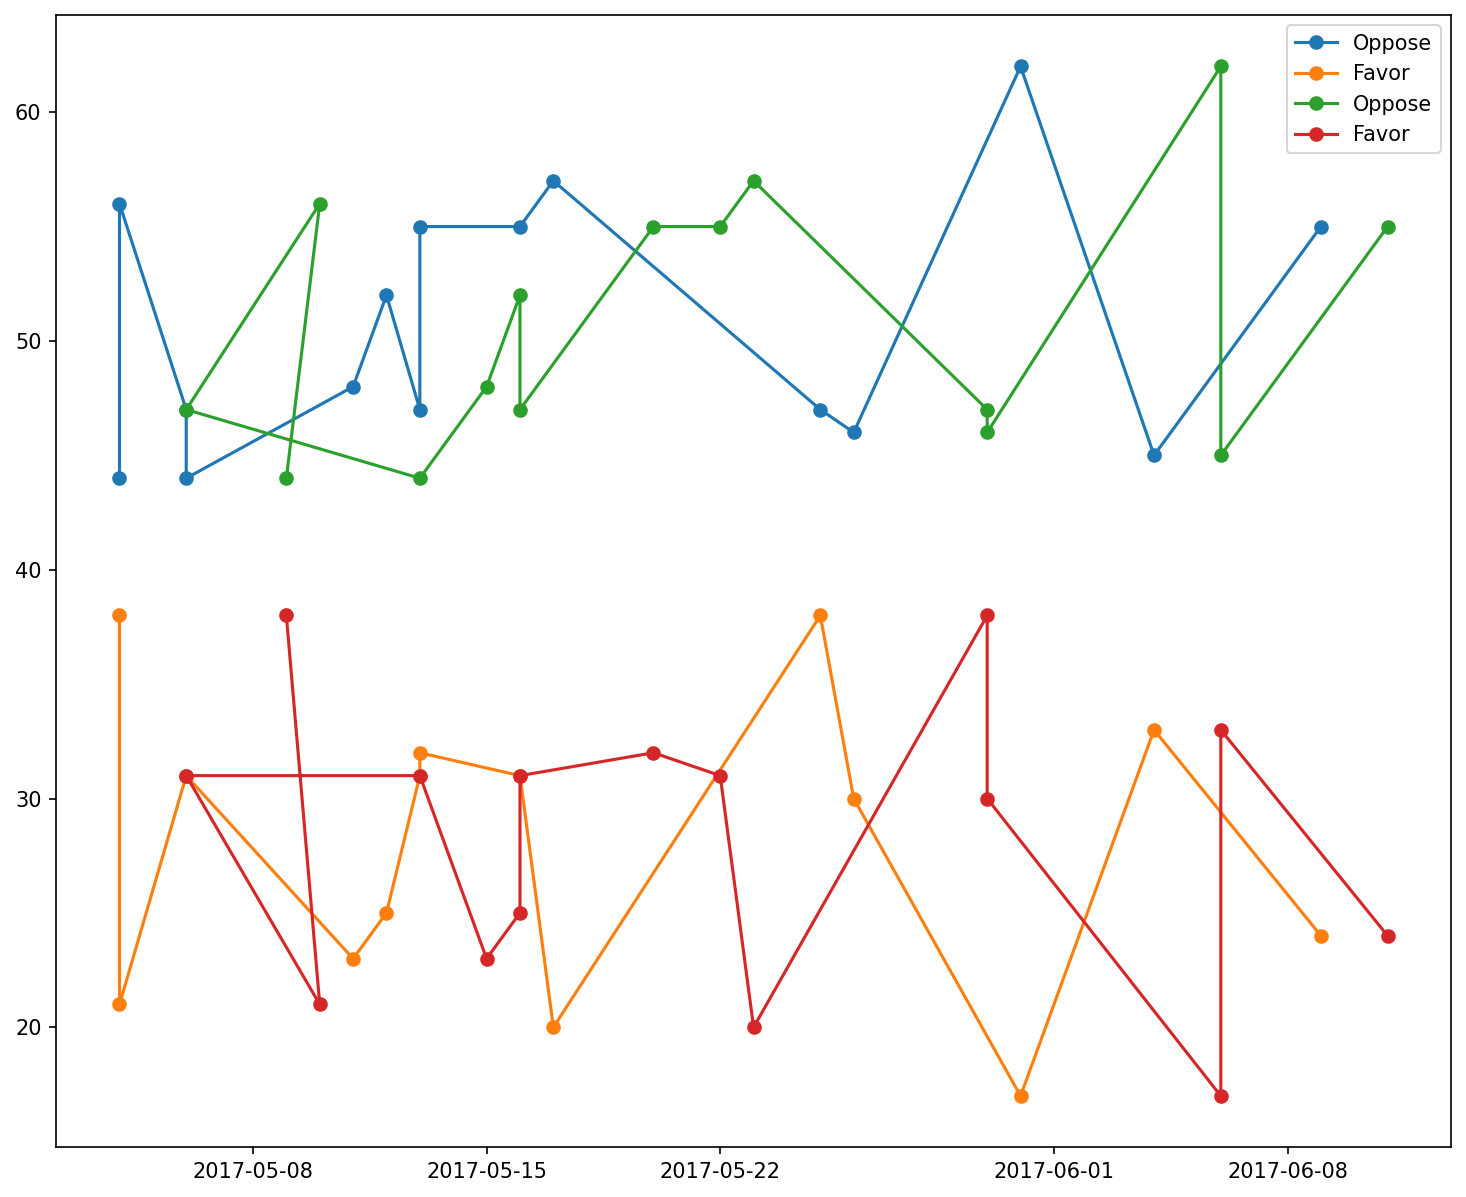

In [77]:
plt.figure(figsize=(12,10),dpi=150)
plt.plot('Start','Oppose',marker='o',data=data_droped)
plt.plot('Start','Favor',marker='o',data=data_droped)
plt.plot('End','Oppose',marker='o',data=data_droped)
plt.plot('End','Favor',marker='o',data=data_droped)
plt.legend()

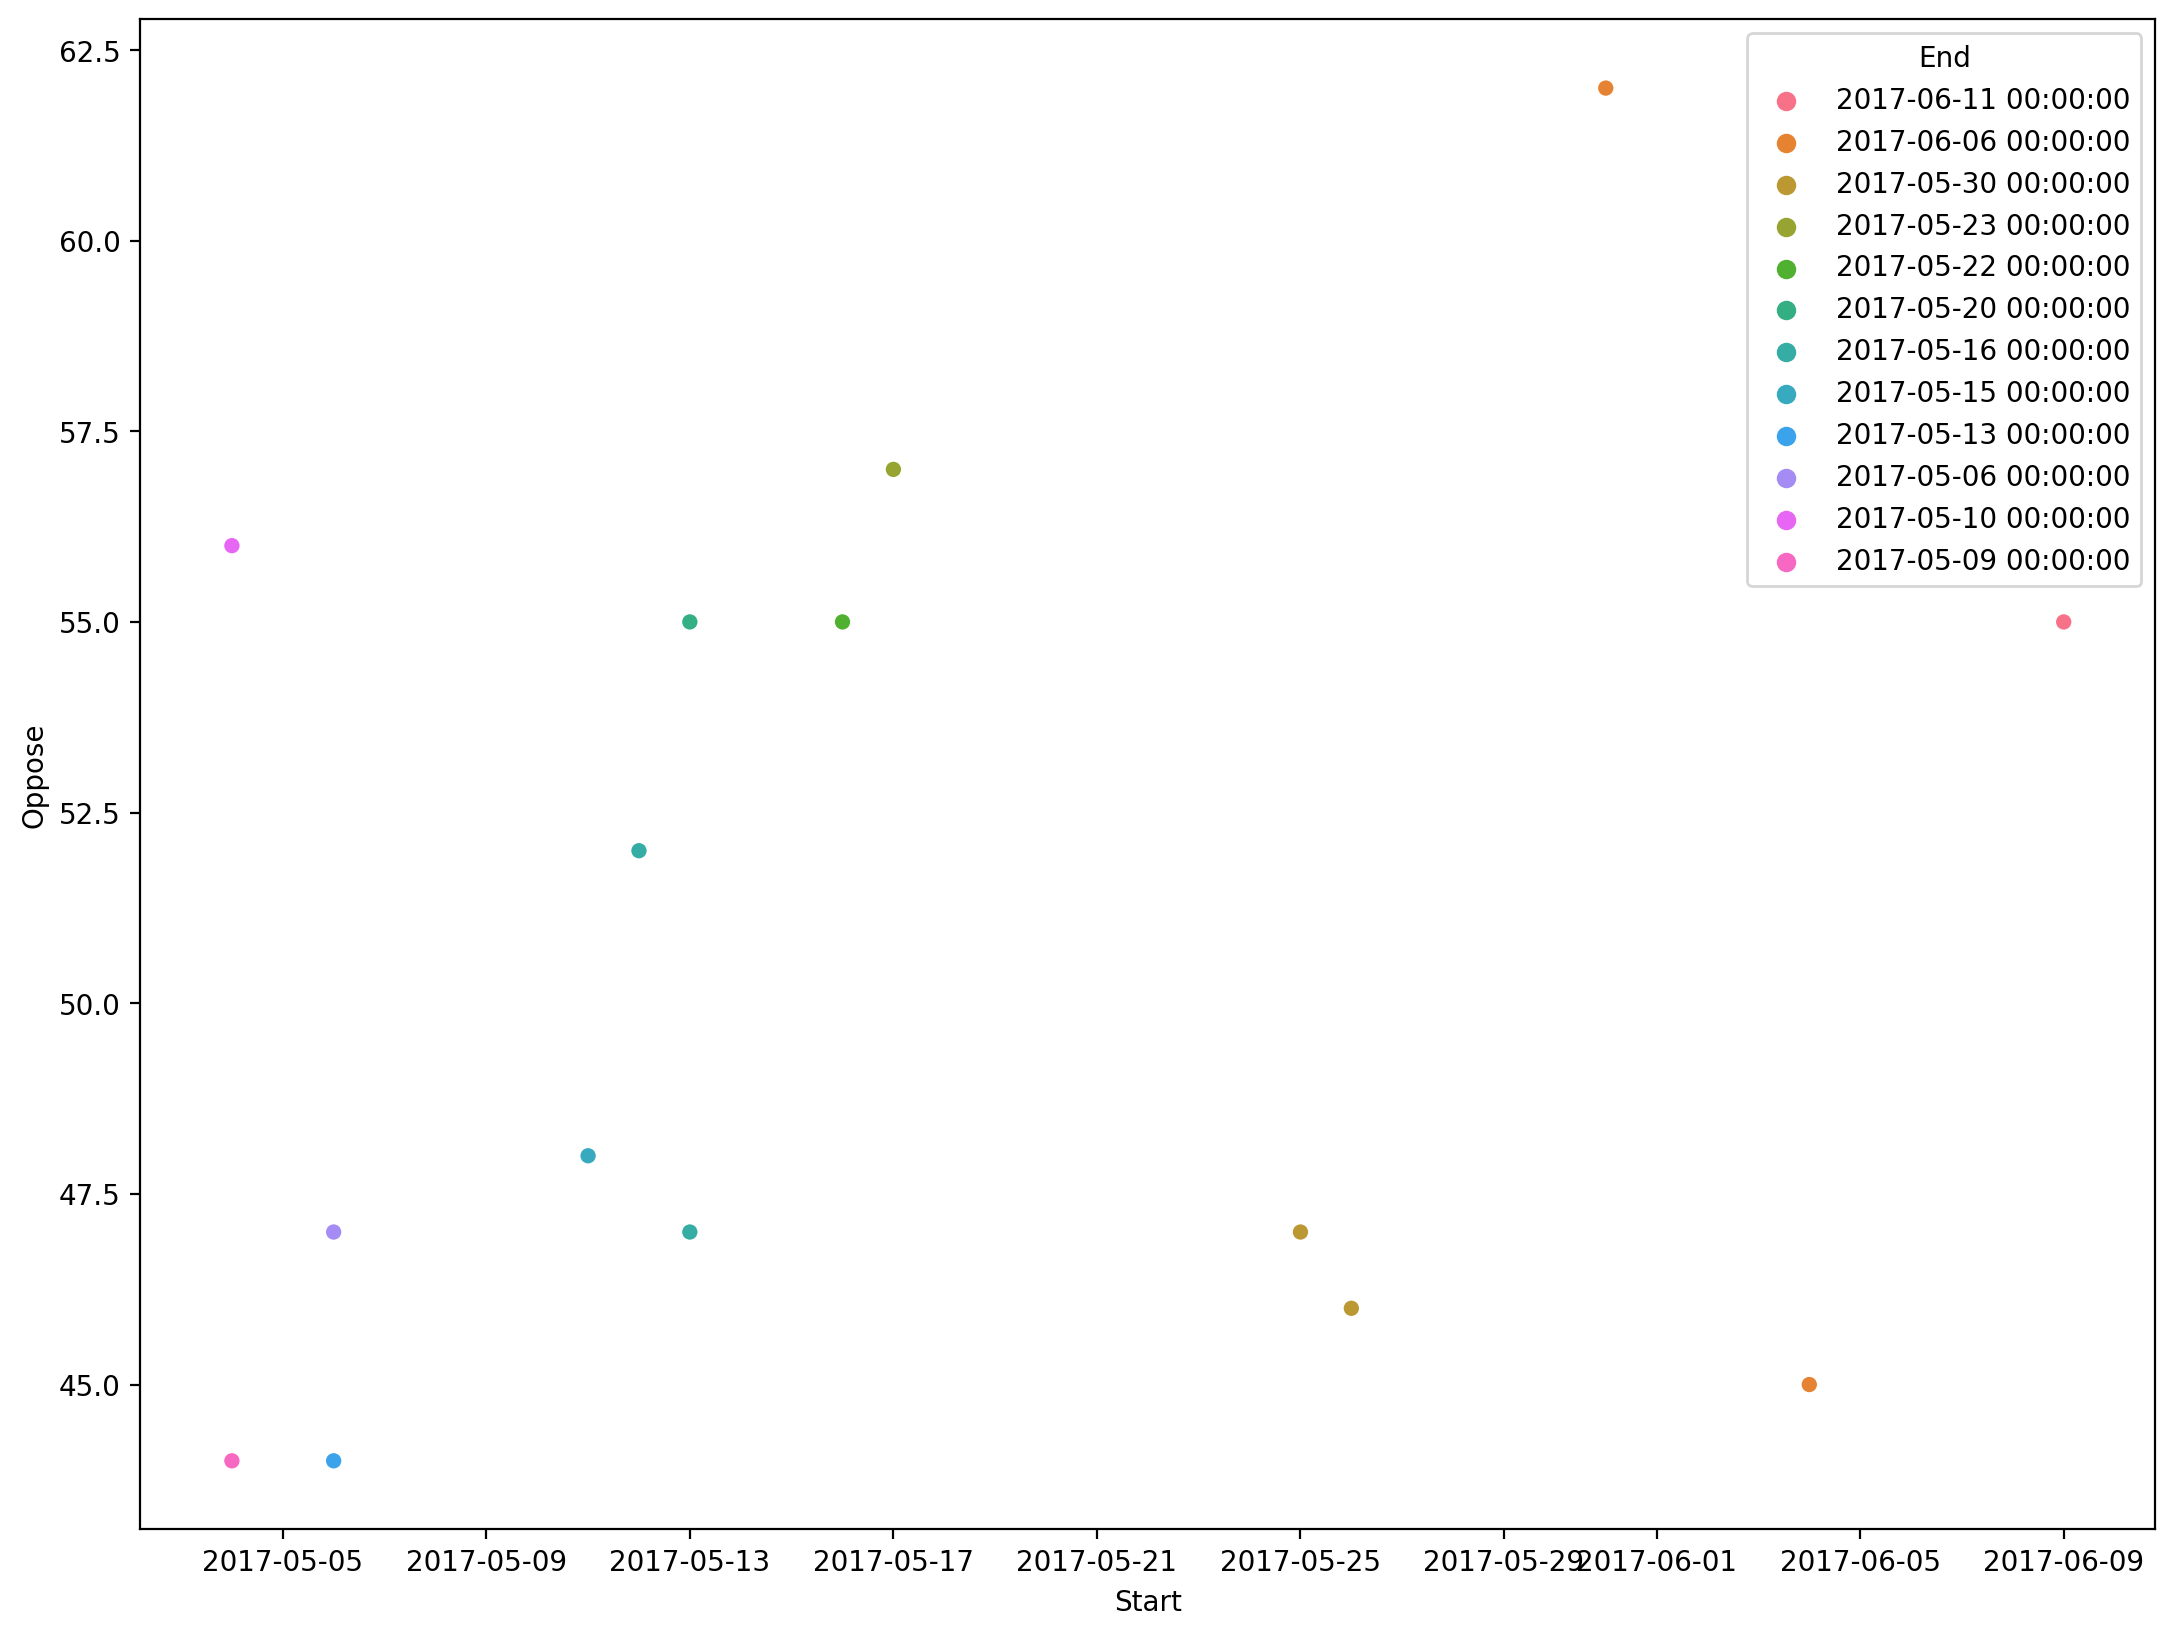

In [19]:
plt.figure(figsize=(13,10),dpi=200)
sns.scatterplot(data=data_droped,x='Start',y='Oppose',hue='End');

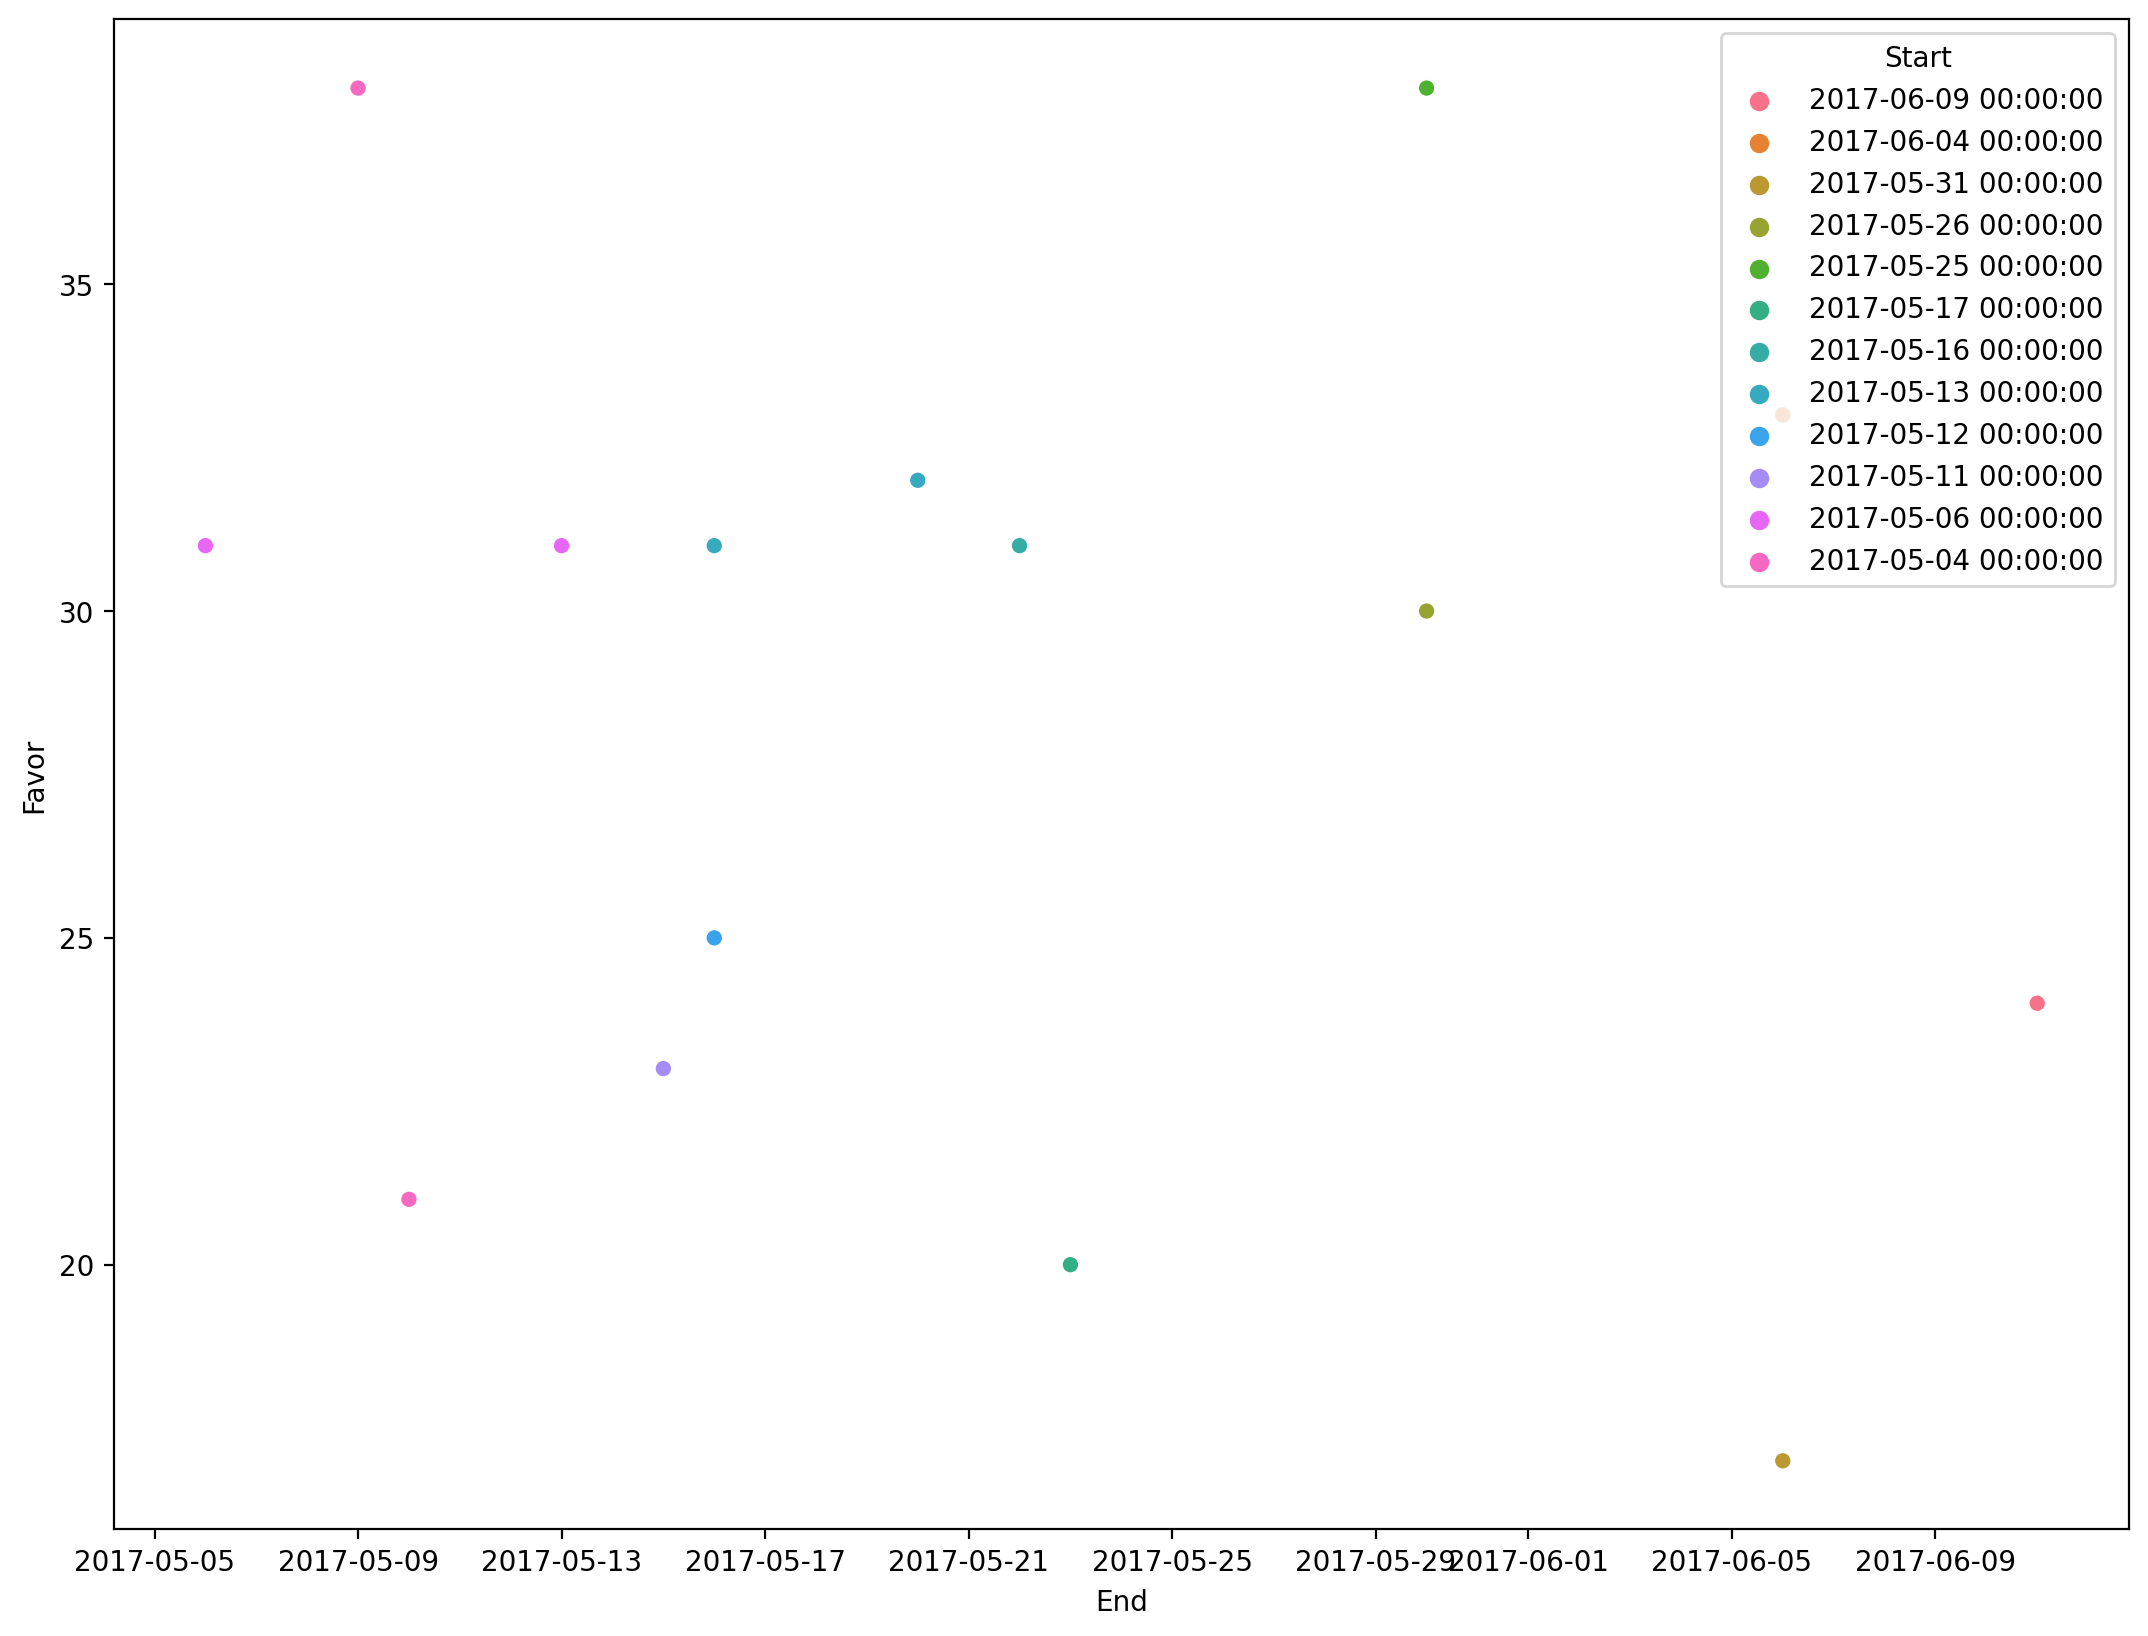

In [78]:
plt.figure(figsize=(13,10),dpi=200)
sns.scatterplot(data=data_droped,x='End',y='Favor',hue='Start');

In [51]:
data_group = data_droped.groupby(data_droped['Start'])

In [55]:
data_group.agg('Favor')

#### Analysis on Data

##### Data is on America Heath Care bill to *Either Oppose or in Favor* of Abolishing the ObamaCare

The data has columns*(features)* :
1. Start - The begining of the polls
2. End - The ending of the polls
3. Favor - The number of people in favour of the bill
4. Oppose - The number of people who oppose the  bill